# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)
html = browser.html


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
weather_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = weather_soup.find('table', class_='table')
rows = table.find_all('tr', class_="data-row")
rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    row_data = row.find_all('td')
    mars_data.append([r.text.strip('[]') for r in row_data])

mars_data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_data, columns=['id', 'terrestrial_date',
                                           'sol', 'ls', 'month',
                                           'min_temp', 'pressure'])

In [8]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_df['id'] = mars_df['id'].astype(int)
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'], dayfirst=True)
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['id'] = mars_df['id'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
months = mars_df['month'].nunique()
print(f'There are {months} Martian months in this dataset.')

There are 12 Martian months in this dataset.


### Since Mars does not have a predictably orbiting moon to measure "months," Mars has no set number of months.

As found at https://www.planetary.org/articles/mars-calendar:

"Unlike on Earth, there is no leisurely-orbiting moon to give Mars "months," and while there have been many imaginative calendars suggested for Mars, none is in common use. The way that scientists mark the time of Mars year is to use solar longitude, abbreviated Ls (read "ell sub ess"). Ls is 0° at the vernal equinox (beginning of northern spring), 90° at summer solstice, 180° at autumnal equinox, and 270° at winter solstice."

In [13]:
# 2. How many Martian days' worth of data are there?
days = mars_df['sol'].nunique()
print(f'There are {days} days worth of data in the dataset')

There are 1867 days worth of data in the dataset


In [14]:
# 3. What is the average low temperature by month?
low_temp = mars_df.groupby(['month']).mean()[('min_temp')]
temp_df = pd.DataFrame(low_temp)
temp_df


,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


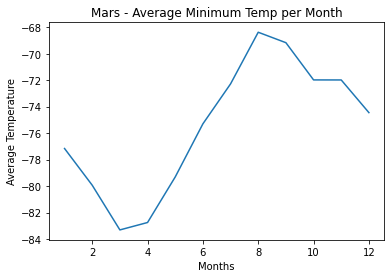

In [15]:
# Plot the average temperature by month
plt.plot(temp_df.index, temp_df)
plt.xlabel("Months")
plt.ylabel("Average Temperature")
plt.title("Mars - Average Minimum Temp per Month")
plt.savefig('Output/Month_Temp.png')
plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location
coldest_m = round(temp_df['min_temp'].idxmin(), 2)
coldest_t = round(temp_df['min_temp'].min(), 2)
print(f"In the Curiosity's location, the {coldest_m}rd month is coldest, with an average temperature of {coldest_t} C")

hottest_m = round(temp_df['min_temp'].idxmax(), 2)
hottest_t = round(temp_df['min_temp'].max(), 2)
print(f"In the Curiosity's location, the {hottest_m}th month is hottest, with an average temperature of {hottest_t} C")


In the Curiosity's location, the 3rd month is coldest, with an average temperature of -83.31 C
In the Curiosity's location, the 8th month is hottest, with an average temperature of -68.38 C


In [17]:
# 4. Average pressure by Martian month
pressure = mars_df.groupby(['month']).mean()[('pressure')]
press_df = pd.DataFrame(pressure)
press_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


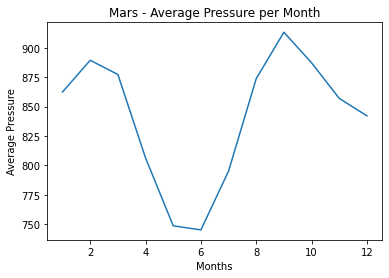

In [18]:
# Plot the average pressure by month
plt.plot(press_df.index, press_df)
plt.xlabel("Months")
plt.ylabel("Average Pressure")
plt.title("Mars - Average Pressure per Month")
plt.savefig('Output/Pressure.png')
plt.show()

### Summary Analysis of temperature and pressure

#### Average Temperature
The third month has the coldest average minimum temperature on Mars (-83.31 Celsius), and the eighth month has the warmest average minimum temperature (-68.38 Celsius).

#### Average Pressure
The sixth month has the lowest average atmospheric pressure (745.05) and the ninth month has the highest (913.31).


In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Create table to find daily minimum temperature
daily_temp = mars_df[['sol', 'min_temp']]
daily_df = pd.DataFrame(daily_temp).set_index('sol')
daily_df

,min_temp
sol,
10,-75.0
11,-76.0
12,-76.0
13,-74.0
14,-74.0
...,...
1973,-78.0
1974,-77.0
1975,-76.0


In [20]:
# Order by descending minimum temperature to show "peaks" in data
daily_df.sort_values('min_temp', ascending=False)

,min_temp
sol,
1692,-62.0
1020,-63.0
152,-63.0
143,-63.0
109,-64.0
...,...
1234,-88.0
1237,-88.0
1239,-89.0


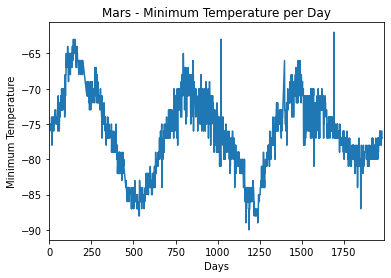

In [21]:
# Plot daily minimum temperature
plt.plot(daily_df.index, daily_df)
plt.xlabel("Days")
plt.ylabel("Minimum Temperature")
plt.title("Mars - Minimum Temperature per Day")
plt.xlim(0,1990)
plt.savefig('Output/Daily_Temp.png')
plt.show()

### How many terrestrial days are there in a Martian day (sol)?

The plot showing daily minimum temperature shows the rise and fall of the "year" on Mars.  The distance between two "peaks" in the data, days 1692 and 1020, is 672.  Therefore, there are roughly 672 terrestrial days in a Martian year.  

This is confirmed at https://mars.nasa.gov/resources/21392/mars-in-a-minute-how-long-is-a-year-on-mars/#:~:text=The%20Earth%20zips%20around%20the,year%20means%20longer%20seasons%20too.:

"The Earth zips around the Sun at about 67,000 miles per hour, making a full revolution in about 365 days - one year on Earth. Mars is a little slower, and farther from the sun, so a full circuit takes 687 Earth days - or one Mars year."

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
mars_df.to_csv('Output/Mars_Data.csv')

In [23]:
browser.quit()